**Information:** *Apply the concepts of generalization and regularization to Linear Regression*

**Written by:** *Zihao Xu*

**Last updated date:** *Oct.15.2021*

# Generalization for Polynomial Regression
Here is a simple example showing the concepts of overfitting and underfitting. Here directly use the **``Scikit-Learn``** package for convenience.

## A three-degree polynomial
First let's try with a three-degree polynomial, where we indeed know what the best model is.

### Generate Dataset
Try to fit a linear regression model to the data generated from
$$y_i=10+1.5x_i-2\frac{x_i^2}{2!}+2.5\frac{x_i^3}{3!}+\epsilon_i$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([-2,2])$. Then the true parameters are $\boldsymbol{\theta}^*=\begin{bmatrix}10&1.5&-1&0.417\end{bmatrix}^T$

First generate the dataset and visualize it

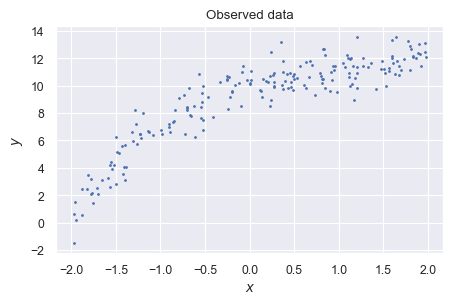

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Ensure reproducibility
np.random.seed(1234)
# Plot setting
sns.set()
sns.set_context('paper')

# Size of training set and validation set
num_train, num_test = 160, 40
# Number of total observations
num_obs = num_train + num_test
# Sample x
x = (4 * np.random.rand(num_obs) - 2).reshape(-1, 1)
# Get the polynomial featurtes
y = 10 + 1.5 * x - 2 * x ** 2 / 2 + 2.5 * x ** 3 / 6\
+ 1 * np.random.randn(num_obs).reshape(-1,1)
# Visualize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

### Split training set and validation set
The naive way is to simply divide the observations into two parts

Shape of train set:		 (160, 1)
Shape of validation set:	 (40, 1)


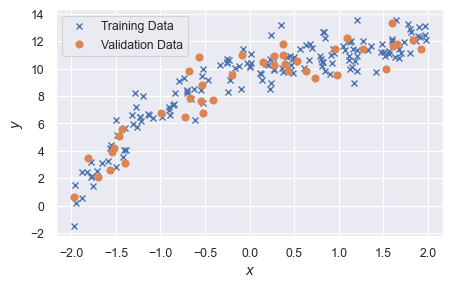

In [2]:
# Get x and y zipped
data = np.concatenate((x, y), axis=1)
# Randomly permute rows
data_permuted = np.random.permutation(data)
# Split in a training set by picking the first num_train rows
data_train = data_permuted[:num_train]
# Split in a validation set
data_val = data_permuted[num_train:]
# Get x_train and y_train
x_train = data_train[:, 0].reshape(-1, 1)
y_train = data_train[:, 1].reshape(-1, 1)
# Get x_val and y_val
x_val = data_val[:, 0].reshape(-1, 1)
y_val = data_val[:, 1].reshape(-1, 1)
# Sanity check
print('Shape of train set:\t\t', x_train.shape)
print('Shape of validation set:\t', x_val.shape)
# Visualization
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x_train, y_train, 'x', label='Training Data')
ax.plot(x_val, y_val, 'o', label='Validation Data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

We can also use the **[``train_test_split``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** utility in **``Scikit-Learn``** to separate the training set and validation set easily

Shape of train set:		 (160, 1)
Shape of validation set:	 (40, 1)


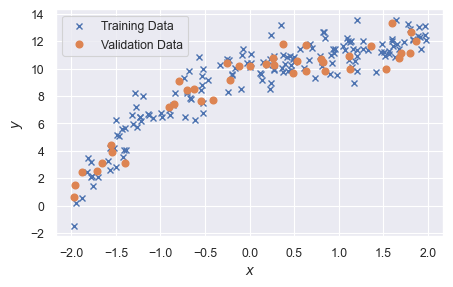

In [3]:
from sklearn.model_selection import train_test_split

# Split the training set and validation set
x_train, x_val, y_train, y_val = \
train_test_split(x,y,test_size=0.2,random_state=123)
# Sanity check
print('Shape of train set:\t\t', x_train.shape)
print('Shape of validation set:\t', x_val.shape)
# Visualization
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x_train, y_train, 'x', label='Training Data')
ax.plot(x_val, y_val, 'o', label='Validation Data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

### Train and validation - Gird Search
Let's find the best polynomial degree by training and validation. Here the best model capacity is selected by **gird search**

Degree 3 gives the minimized validation mean square error.


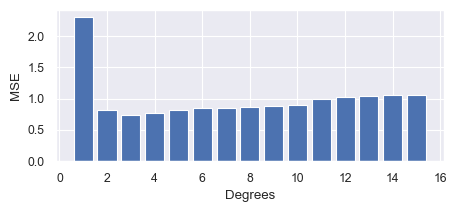

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Try with different degrees
degrees = np.arange(1, 16)
MSE = []
Estimator = []
for index, degree in enumerate(degrees):
    # Assign the regression model and preprocessing method
    estimator = make_pipeline(PolynomialFeatures(degree,include_bias=True),\
                              LinearRegression(fit_intercept=False))
    # Fit with the created model
    estimator.fit(x_train, y_train)
    # See the performance on evaluation points
    y_pred = estimator.predict(x_val).reshape(-1, 1)
    # Calculate the validation MSE
    loss = np.sum((y_pred - y_val)**2) / y_pred.shape[0]
    # Record the trained model and validation error
    Estimator.append(estimator)
    MSE.append(loss)
# Get the minimum index
print("Degree %d gives the minimized validation mean square error." \
      %(np.argmin(MSE) + 1))
# Plot out the validation MSE for different degrees
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
ax.bar(range(1, len(MSE) + 1), MSE)
ax.set_xlabel('Degrees')
ax.set_ylabel('MSE')
plt.show()

### Visualization - Underfitting, Normal fitting and Overfitting
Here shows the visualization of three types of fitting

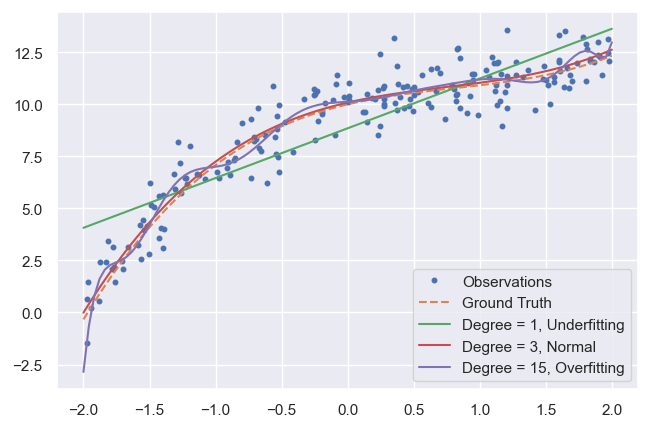

In [5]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=125)
xe = np.linspace(-2, 2, 100).reshape(-1, 1)
ye_gt = 10 + 1.5 * xe - 2 * xe**2 / 2 + 2.5 * xe**3 / 6
ye_1 = Estimator[0].predict(xe)
ye_3 = Estimator[2].predict(xe)
ye_15 = Estimator[14].predict(xe)
ax.plot(x, y, '.', label='Observations')
ax.plot(xe, ye_gt, '--', label='Ground Truth')
ax.plot(xe, ye_1, label='Degree = 1, Underfitting')
ax.plot(xe, ye_3, label='Degree = 3, Normal')
ax.plot(xe, ye_15, label='Degree = 15, Overfitting')
plt.legend(loc='best')
plt.show()

As shown in the plot, the curve with one degree can not capture the features well and is said to be underfitting. The curve with $15$ degrees shows strange predictions is said to be overfitting.

%%latex
\newpage

## A sinusoidal wave
Now let's try to use the **grid search** method to find the best polynomial degree for approximation. The sinusoidal wave to be used is the similar to what we met before in the introduction to linear regression.

### Generate Dataset
Try to use polynomial features to fit a noisy version of a sin wave 
$$
y_i=\text{sin}(x_i)+0.1*\epsilon
$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([0,4\pi])$

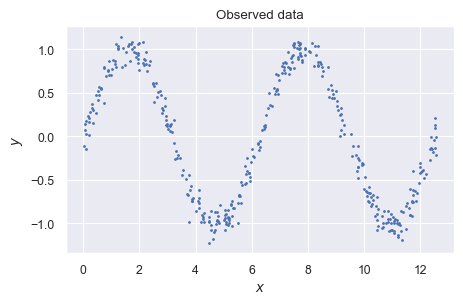

In [6]:
# Number of observations
num_obs = 400
# Sample x
x_sin = 4 * np.pi * np.random.rand(num_obs).reshape(-1, 1)
# Calculate y samples
y_sin = np.sin(x_sin) + 0.1 * np.random.randn(num_obs).reshape(-1, 1)
# Visulize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x_sin, y_sin, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

### Split training set and validation set
Here use the **``train_test_split``** utility directly

Shape of train set:		 (160, 1)
Shape of validation set:	 (40, 1)


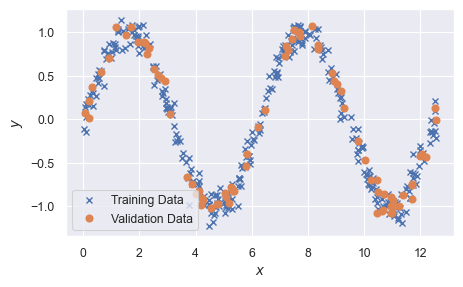

In [7]:
x_sin_train, x_sin_val, y_sin_train, y_sin_val = \
train_test_split(x_sin,y_sin,test_size=0.2,random_state=123)
# Sanity check
print('Shape of train set:\t\t', x_train.shape)
print('Shape of validation set:\t', x_val.shape)
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x_sin_train, y_sin_train, 'x', label='Training Data')
ax.plot(x_sin_val, y_sin_val, 'o', label='Validation Data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

### Use grid search to find the best model

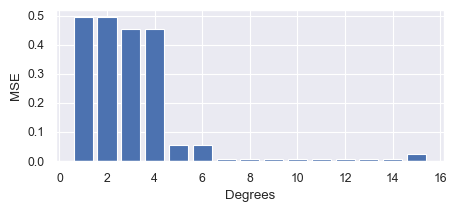

In [8]:
# Try with different degrees
degrees = np.arange(1, 16)
MSE_sin = []
Estimator_sin = []
for index, degree in enumerate(degrees):
    # Assign the regression model and preprocessing method
    estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Fit with the created model
    estimator.fit(x_sin_train, y_sin_train)
    # See the performance on evaluation points
    y_sin_pred = estimator.predict(x_sin_val).reshape(-1, 1)
    # Calculate the validation MSE
    loss = np.sum((y_sin_pred - y_sin_val)**2) / y_sin_pred.shape[0]
    # Record the trained model and validation error
    Estimator_sin.append(estimator)
    MSE_sin.append(loss)
# Plot out the MSE for different degrees
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
ax.bar(range(1, len(MSE_sin) + 1), MSE_sin)
ax.set_xlabel('Degrees')
ax.set_ylabel('MSE')
plt.show()

Focus on several higher degrees to have a clearer view.

Degree 9 gives the minimized validation mean square error.
The minimal validation mean square error is 0.006528


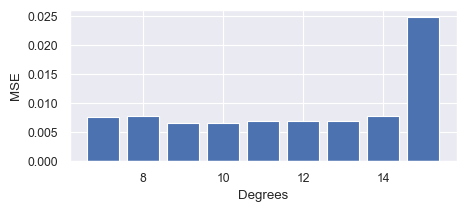

In [9]:
# Get the minimum index
print("Degree %d gives the minimized validation mean square error." \
      %(np.argmin(MSE_sin) + 1))
# Get the minimum value
print("The minimal validation mean square error is %f"\
      %MSE_sin[np.argmin(MSE_sin)])
# Plot out the MSE for different degrees
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
ax.bar(range(7, len(MSE_sin) + 1), MSE_sin[6:])
ax.set_xlabel('Degrees')
ax.set_ylabel('MSE')
plt.show()

### Visualization
Since the grid search gives the best model with degree $9$, let's assume it is the normal fitting and show the underfitting and overfitting models.

The validation mean square error for degree 3 is 0.454904
The validation mean square error for degree 9 is 0.006528
The validation mean square error for degree 15 is 0.024820


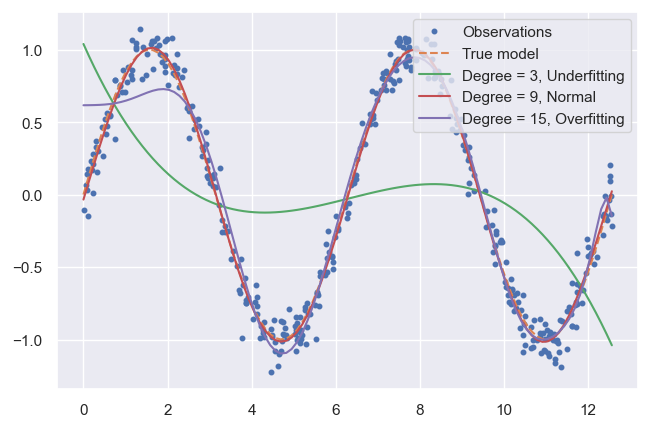

In [10]:
# Get the corresponding validation MSE
mse_3 = MSE_sin[2]
mse_9 = MSE_sin[8]
mse_15 = MSE_sin[14]
print("The validation mean square error for degree 3 is %f"\
     %mse_3)
print("The validation mean square error for degree 9 is %f"\
     %mse_9)
print("The validation mean square error for degree 15 is %f"\
     %mse_15)
# Visualization
fig, ax = plt.subplots(figsize=(6, 4), dpi=125)
xe_sin = np.linspace(0, 4 * np.pi, 100).reshape(-1, 1)
ye_sin_gt = np.sin(xe_sin)
ye_sin_3 = Estimator_sin[2].predict(xe_sin)
ye_sin_9 = Estimator_sin[8].predict(xe_sin)
ye_sin_15 = Estimator_sin[14].predict(xe_sin)
ax.plot(x_sin, y_sin, '.', label='Observations')
ax.plot(xe_sin, ye_sin_gt, '--', label='True model')
ax.plot(xe_sin, ye_sin_3, label='Degree = 3, Underfitting')
ax.plot(xe_sin, ye_sin_9, label='Degree = 9, Normal')
ax.plot(xe_sin, ye_sin_15, label='Degree = 15, Overfitting')
plt.legend(loc='best')
plt.show()

%%latex
\newpage

# Polynomial Regression with Regularization
## Ridge Regression
First try the Ridge regression ($L^2$ Regularization), which is supposed to provide small parameter values. Return to the three order polynomial sampled before and see how ridge regression performs. Assume we do not know what the correct polynomial degree is and directly try with degree $10$, let's check how the regularization performs.

For convenience, here we use the **[``Ridge``](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)** module. For gradient-based methods in PyTorch, set the **weight_decay** parameter when creating an optimizer.

The validation MSE for degree 15 without regularization is 	 1.060776
The validation MSE for degree 15 Ridge Regression is 		 0.996265


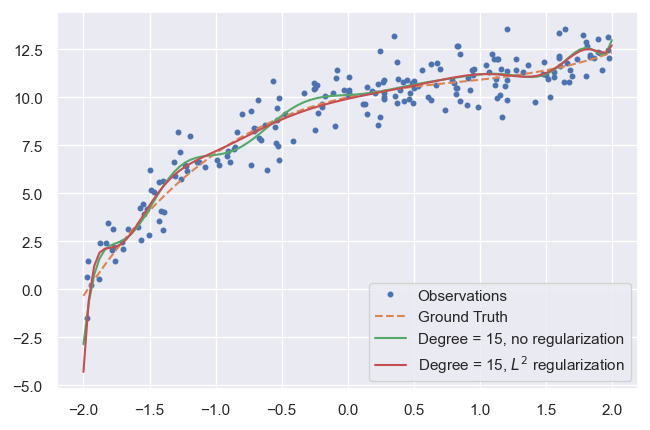

In [11]:
from sklearn.linear_model import Ridge

# Assign the penalty contribution
a = 0.5
estimator_ridge = make_pipeline(PolynomialFeatures(15,include_bias=True),\
                                Ridge(alpha=a,fit_intercept=False))
# Fit with the created model
estimator_ridge.fit(x_train, y_train)
# Calculate the validation MSE
y_pred = estimator_ridge.predict(x_val).reshape(-1, 1)
mse_ridge = np.sum((y_pred - y_val)**2) / y_pred.shape[0]
# Check the validation errors
mse_15 = MSE[14]
print("The validation MSE for degree 15 without regularization is \t %f"\
      %mse_15)
print("The validation MSE for degree 15 Ridge Regression is \t\t %f"\
      %mse_ridge)
# Visualization
fig, ax = plt.subplots(figsize=(6, 4), dpi=125)
ye_ridge = estimator_ridge.predict(xe)
ax.plot(x, y, '.', label='Observations')
ax.plot(xe, ye_gt, '--', label='Ground Truth')
ax.plot(xe, ye_15, label='Degree = 15, no regularization')
ax.plot(xe, ye_ridge, label='Degree = 15, $L^2$ regularization')
plt.legend(loc='lower right')
plt.show()

The result shows although we do not know the correct polynomial degree, we can still get a slightly better result by adding the $L^2$ regularization term. Let's check the parameters.

In [12]:
# Parameters for Ridge Regression
print("The parameters for Ridge Regression is:")
print(estimator_ridge[1].coef_)
# Parameters without regularization
print("The parameters without regularization is:")
print(Estimator[14][1].coef_)

The parameters for Ridge Regression is:
[[ 9.92025585  1.54512966 -0.77279222  0.96833614 -0.08916203 -0.157685
   0.26684804 -0.50020823 -0.02888234 -0.08927738 -0.17628237  0.36084806
   0.08684365 -0.13865244 -0.01135734  0.01554176]]
The parameters without regularization is:
[[ 1.01217656e+01  3.69934936e-01  5.99300809e-01  6.78142052e+00
  -1.07245194e+01 -8.03626357e+00  1.95119762e+01  3.07031663e+00
  -1.52281450e+01  1.94844435e-01  5.80956525e+00 -3.44435389e-01
  -1.06743981e+00  6.19011300e-02  7.55013017e-02 -2.57454315e-03]]


While the correct polynomial degree is $3$, the Ridge regression does not show special attention for the first three polynomial features while it indeed decreases the validation error.

%%latex
\newpage

## Lasso Regression
Now let's try the Lasso regression, which is supposed to zero out unnecessary weights and help us select features.

One choice is to use the **[``Lasso``](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)** module. The **``Scikit-Learn``** uses **coordinate descent** to solve the Lasso Regression problem since it's hard to get a beautiful analytic solution with $L^1$ regularization. However, as mentioned in *Numerical Optimization*, coordinate descent typically need a large amount of updates. Therefore, we only require a relatively low accuracy here, which means using a big optimization tolerance.

If we're trying to use SGD optimization with PyTorch, pay attention to the the gradient near zero. Typically, if we directly take the abstract values of the parameters, the automatic differentiation will simply use a $\text{sign}(\cdot)$ function for computing derivatives and we should not expect exact sparsity. The parameters which are supposed to be exactly zero will oscillate around the origin. For sparsity and easy feature selection, some additional tricks are needed in the training process.

The validation MSE for degree 15 without regularization is 	 1.060776
The validation MSE for degree 15 Lasso Regression is 		 0.894394


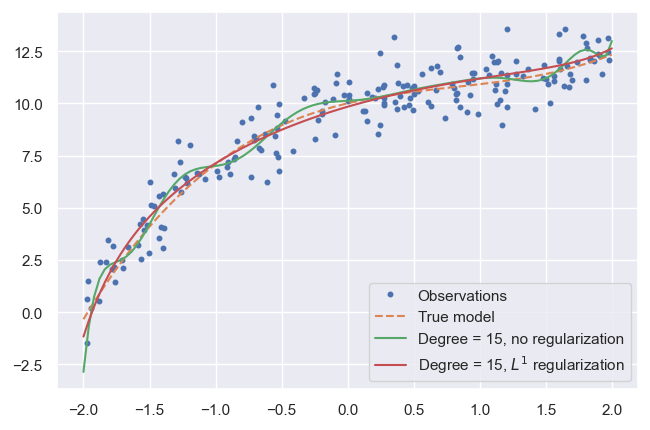

In [13]:
from sklearn.linear_model import Lasso

# Assign the penalty contribution
a = 0.003
# Max iteration number
num_iter = 8000
# Optimization tolerance
tolerance = 0.01
estimator_lasso = make_pipeline(PolynomialFeatures(degree,include_bias=True), \
                                Lasso(alpha=a,max_iter=num_iter,\
                                     tol=tolerance,\
                                     fit_intercept=False))
# Fit with the created model
estimator_lasso.fit(x_train, y_train)
# Calculate the validation MSE
y_pred = estimator_lasso.predict(x_val).reshape(-1, 1)
mse_lasso = np.sum((y_pred - y_val)**2) / y_pred.shape[0]
# Check the validation errors
print("The validation MSE for degree 15 without regularization is \t %f"\
      %mse_15)
print("The validation MSE for degree 15 Lasso Regression is \t\t %f"\
      %mse_lasso)
# Visualization
fig, ax = plt.subplots(figsize=(6, 4), dpi=125)
ye_lasso = estimator_lasso.predict(xe)
ax.plot(x, y, '.', label='Observations')
ax.plot(xe, ye_gt, '--', label='True model')
ax.plot(xe, ye_15, label='Degree = 15, no regularization')
ax.plot(xe, ye_lasso, label='Degree = 15, $L^1$ regularization')
plt.legend(loc='lower right')
plt.show()

Similarly, we get a slightly better result with $L^1$ regularization. Check the parameters and see whether the regularization leads to some sparsities.

In [14]:
# Parameters for Lasso Regression
print("The parameters for Lasso Regression is:")
print(estimator_lasso[1].coef_)
# Parameters without regularization
print("The parameters without regularization is:")
print(Estimator[14][1].coef_)

The parameters for Lasso Regression is:
[ 9.83780013e+00  1.84385920e+00 -6.40330132e-01  1.56698587e-01
 -3.47330438e-02  2.16739544e-02 -4.56829074e-03  3.52736572e-03
 -8.13461554e-04  5.83845719e-04 -1.67444274e-04  1.02557565e-04
 -3.87465759e-05  1.98913560e-05 -9.58955289e-06  4.26087218e-06]
The parameters without regularization is:
[[ 1.01217656e+01  3.69934936e-01  5.99300809e-01  6.78142052e+00
  -1.07245194e+01 -8.03626357e+00  1.95119762e+01  3.07031663e+00
  -1.52281450e+01  1.94844435e-01  5.80956525e+00 -3.44435389e-01
  -1.06743981e+00  6.19011300e-02  7.55013017e-02 -2.57454315e-03]]


Although we could not see any exact sparsity in the parameters, it's obvious that by adding $L^1$ regularization, coefficients for polynomial features with degree greater than $3$ is much smaller, which implies the first three degrees are the most important features. In the meantime, the coefficients for the first three polynomial features are much closer to the true parameters.